**3.2.3. Bài tập thực hành 1**
Xây dựng mô hình phân cụm đa cấp trên tập dữ liệu chim cánh cụt. Dữ liệu lấy tại: 
https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering

### 1. Chuẩn bị dữ liệu
- Đọc tập penguins, giữ các cột số phục vụ phân cụm.
- Làm sạch giá trị thiếu và ngoại lai (cắt 1-99% quantile).
- Chuẩn hóa và giảm chiều bằng PCA để trực quan.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# Đọc dữ liệu
file_path = "Dataset/penguins.csv"
raw_df = pd.read_csv(file_path)

num_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
df = raw_df[num_cols].apply(pd.to_numeric, errors="coerce")

# Loại giá trị thiếu
df = df.dropna()

# Loại ngoại lai bằng cắt quantile 1%-99% cho từng cột
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Chuẩn hóa
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Giảm chiều để trực quan
pca = PCA(n_components=2, random_state=42)
df_2d = pca.fit_transform(df_scaled)

print("Kích thước sau làm sạch:", df.shape)
df.head()


Kích thước sau làm sạch: (315, 4)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


### 2. Phân cụm đa cấp (Agglomerative)
- Dùng `AgglomerativeClustering` với 3 cụm, liên kết `average`.
- Vẽ phân bố cụm trên không gian PCA 2 chiều.


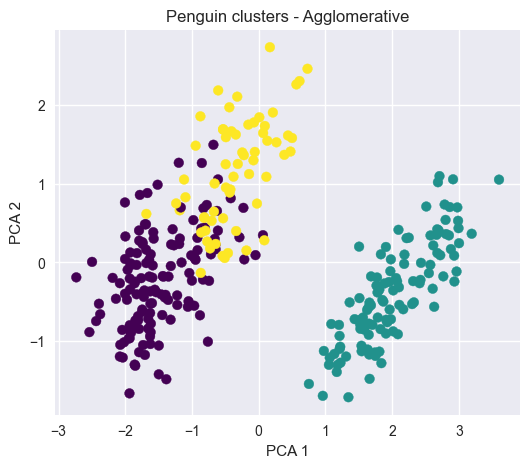

In [2]:
ac = AgglomerativeClustering(n_clusters=3, linkage="average")
ac_labels = ac.fit_predict(df_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=ac_labels, cmap="viridis")
plt.title("Penguin clusters - Agglomerative")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


### 3. Phân cụm K-Means
- Huấn luyện K-Means với 3 cụm để so sánh.
- Vẽ cụm trên không gian PCA tương tự.


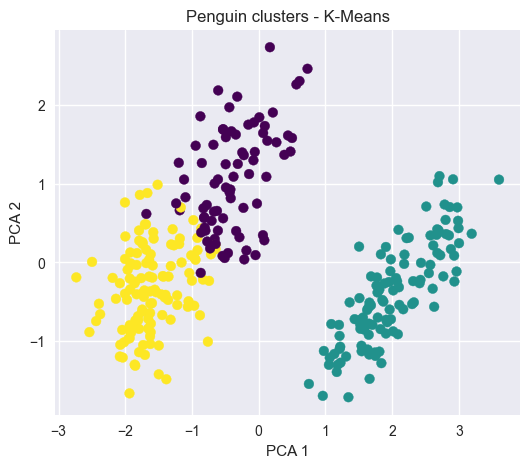

In [3]:
km = KMeans(n_clusters=3, random_state=42, n_init=10)
km_labels = km.fit_predict(df_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=km_labels, cmap="viridis")
plt.title("Penguin clusters - K-Means")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


### 4. So sánh Silhouette
Tính Silhouette Score cho mỗi mô hình (cao hơn là tốt hơn).


In [4]:
ac_sil = silhouette_score(df_scaled, ac_labels)
km_sil = silhouette_score(df_scaled, km_labels)

print("Silhouette Score (cao hơn tốt hơn):")
print(f"Agglomerative: {ac_sil:.3f}")
print(f"K-Means: {km_sil:.3f}")


Silhouette Score (cao hơn tốt hơn):
Agglomerative: 0.471
K-Means: 0.461
